In [1]:
import numpy as np
import pandas as pd


In [3]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [4]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


KeyError: 'match_id'

In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]+1


In [ ]:
total_score_df

,match_id,inning,total_runs
0,2,2,208
2,3,2,185
4,4,2,184
6,5,2,164
8,6,2,158
...,...,...,...
1518,11348,2,144
1520,11413,2,137
1522,11414,2,172
1524,11415,2,156


In [ ]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')


In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
124,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,0,0,0,NaN,NaN,NaN
125,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,0,0,0,0,1,1,NaN,NaN,NaN
126,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,0,0,0,0,1,0,1,NaN,NaN,NaN
128,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148379,11415,Hyderabad,Mumbai Indians,156,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
148380,11415,Hyderabad,Mumbai Indians,156,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
148381,11415,Hyderabad,Mumbai Indians,156,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
148382,11415,Hyderabad,Mumbai Indians,156,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']


In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])


In [ ]:

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,NaN,NaN,NaN,0,164,119
125,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,0,1,1,NaN,NaN,NaN,1,163,118
126,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,NaN,NaN,NaN,1,163,117
127,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,0,1,0,1,NaN,NaN,NaN,2,162,116
128,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,NaN,NaN,NaN,2,162,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148379,11415,Hyderabad,Mumbai Indians,156,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,4,4
148380,11415,Hyderabad,Mumbai Indians,156,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,2,3
148381,11415,Hyderabad,Mumbai Indians,156,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,1,2
148382,11415,Hyderabad,Mumbai Indians,156,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-1,1


In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets= delivery_df.groupby('match_id')['player_dismissed'].cumsum() # Convert to integer type before cumsum

delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,NaN,NaN,0,164,119,10
125,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,1,1,0,NaN,NaN,1,163,118,10
126,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,NaN,NaN,1,163,117,10
127,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,1,0,1,0,NaN,NaN,2,162,116,10
128,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,NaN,NaN,2,162,115,10


In [ ]:

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,NaN,NaN,0,164,119,10
125,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,1,1,0,NaN,NaN,1,163,118,10
126,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,NaN,NaN,1,163,117,10
127,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,1,0,1,0,NaN,NaN,2,162,116,10
128,5,Bangalore,Royal Challengers Bangalore,164,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,NaN,NaN,2,162,115,10


In [ ]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])


In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)


In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [ ]:
final_df = final_df.sample(final_df.shape[0])



In [ ]:
final_df.sample()


,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
39353,Kolkata Knight Riders,Delhi Daredevils,Delhi,92,43,6,173,6.311688,12.837209,0


In [ ]:
final_df.dropna(inplace=True)


In [ ]:
final_df = final_df[final_df['balls_left'] != 0]


In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline



In [ ]:

pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:

pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:

y_pred = pipe.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7259363957597174

In [ ]:
pipe.predict_proba(X_test)[4]

array([0.91802548, 0.08197452])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [ ]:

def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [ ]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 159


,end_of_over,runs_after_over,wickets_in_over,lose,win
10211,1,4,0,44.0,56.0
10219,2,8,0,38.3,61.7
10225,3,1,0,34.7,65.3
10231,4,7,1,50.0,50.0
10237,5,12,0,43.6,56.4
10243,6,13,0,37.3,62.7
10249,7,9,0,32.1,67.9
10257,8,15,0,26.4,73.6
10263,9,7,0,22.5,77.5
10270,10,17,0,17.9,82.1


Text(0.5, 1.0, 'Target-159')

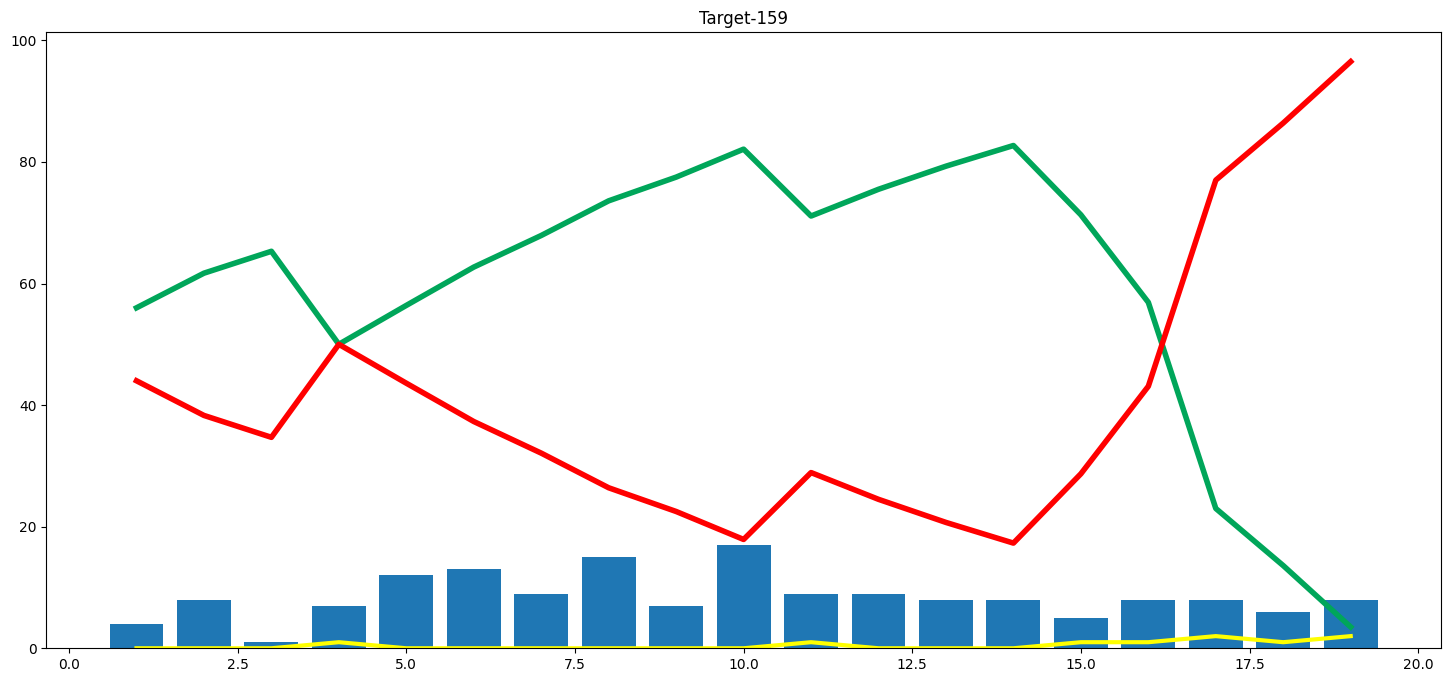

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
delivery_df['city'].unique()


array(['Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi', 'Hyderabad',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))